In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/emotions-dataset-for-nlp/val.txt
/kaggle/input/emotions-dataset-for-nlp/test.txt
/kaggle/input/emotions-dataset-for-nlp/train.txt


In [2]:
df = pd.read_csv("/kaggle/input/emotions-dataset-for-nlp/train.txt",sep=";",
    names=["Description","Emotion"])
df.head(5)

,Description,Emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [3]:
df['Emotion'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: Emotion, dtype: int64

In [4]:
df['label_num'] = df['Emotion'].map({
    'joy' : 0, 
    'sadness': 1, 
    'anger': 2, 
    'fear': 3,
    'love': 4,
    'surprise':5
})


df.head(5)

,Description,Emotion,label_num
0,i didnt feel humiliated,sadness,1
1,i can go from feeling so hopeless to so damned...,sadness,1
2,im grabbing a minute to post i feel greedy wrong,anger,2
3,i am ever feeling nostalgic about the fireplac...,love,4
4,i am feeling grouchy,anger,2


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.Description,df.label_num,test_size=0.2)

In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (12800,)
Shape of X_test:  (3200,)


In [7]:
y_train.value_counts()

0    4292
1    3714
2    1723
3    1563
4    1049
5     459
Name: label_num, dtype: int64

In [8]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.86      0.75      1070
           1       0.73      0.79      0.76       952
           2       0.80      0.55      0.65       436
           3       0.74      0.55      0.63       374
           4       0.74      0.44      0.55       255
           5       0.61      0.27      0.38       113

    accuracy                           0.71      3200
   macro avg       0.71      0.58      0.62      3200
weighted avg       0.71      0.71      0.70      3200



In [9]:
import spacy

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [10]:
nlp = spacy.load("en_core_web_sm")

In [11]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        else:
            filtered_tokens.append(token.lemma_)
    return " ".join(filtered_tokens)
# convert it into one sentence without stop words and punctuations(.,-) and also with the base words.

In [12]:
df['processed_text'] = df["Description"].apply(preprocess)

In [13]:
df

,Description,Emotion,label_num,processed_text
0,i didnt feel humiliated,sadness,1,not feel humiliate
1,i can go from feeling so hopeless to so damned...,sadness,1,feel hopeless damned hopeful care awake
2,im grabbing a minute to post i feel greedy wrong,anger,2,m grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,love,4,feel nostalgic fireplace know property
4,i am feeling grouchy,anger,2,feel grouchy
...,...,...,...,...
15995,i just had a very brief time in the beanbag an...,sadness,1,brief time beanbag say anna feel like beat
15996,i am now turning and i feel pathetic that i am...,sadness,1,turn feel pathetic wait table sub teaching degree
15997,i feel strong and good overall,joy,0,feel strong good overall
15998,i feel like this was such a rude comment and i...,anger,2,feel like rude comment m glad t


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    df.processed_text, 
    df.label_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df.label_num
)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('KNN', KNeighborsClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.82      1072
           1       0.78      0.84      0.81       933
           2       0.80      0.77      0.79       432
           3       0.84      0.69      0.76       387
           4       0.73      0.50      0.60       261
           5       0.73      0.57      0.64       115

    accuracy                           0.78      3200
   macro avg       0.78      0.71      0.74      3200
weighted avg       0.78      0.78      0.78      3200



In [16]:
from sklearn.naive_bayes import MultinomialNB
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Multi NB', MultinomialNB())          
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.97      0.77      1072
           1       0.69      0.93      0.79       933
           2       0.93      0.38      0.53       432
           3       0.91      0.32      0.48       387
           4       1.00      0.08      0.14       261
           5       1.00      0.01      0.02       115

    accuracy                           0.69      3200
   macro avg       0.86      0.45      0.46      3200
weighted avg       0.77      0.69      0.63      3200



In [17]:
from sklearn.ensemble import RandomForestClassifier
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1072
           1       0.90      0.88      0.89       933
           2       0.85      0.81      0.83       432
           3       0.81      0.81      0.81       387
           4       0.83      0.66      0.74       261
           5       0.81      0.71      0.76       115

    accuracy                           0.85      3200
   macro avg       0.84      0.80      0.82      3200
weighted avg       0.85      0.85      0.85      3200



In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[977,  29,  18,  14,  29,   5],
       [ 54, 821,  26,  21,   7,   4],
       [ 39,  27, 350,  16,   0,   0],
       [ 21,  28,  13, 315,   0,  10],
       [ 75,   6,   5,   2, 173,   0],
       [ 12,   2,   0,  19,   0,  82]])

Text(95.72222222222221, 0.5, 'Truth')

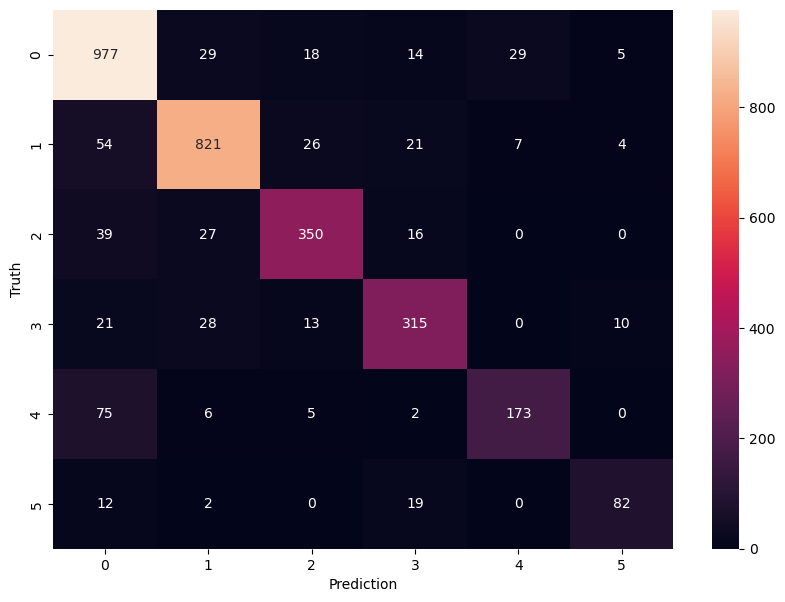

In [19]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')